# Lecture 4

Again we will only be able to scratch the surface, for a much deeper overview have a look at the recent [Scipy Lecture Notes](http://www.scipy-lectures.org)

The reason we use numpy, it's that it is essentially faster for array and matrix manipulations and provides many facilities, as you have seen from last lecture.

One nice feature is the `lookfor` command

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

In fact we have already seen many of them: `linspace`, `ones`, `zeros`

So there are many ways of creating arrays, the simplest one is

In [3]:
a = np.array([0, 1, 2, 3], dtype=float) # dtype is optional and allows us to specify the required type
print(a)

[ 0.  1.  2.  3.]


In [4]:
a = np.array([0, 1, 2, 3], dtype=complex) # dtype is optional and allows us to specify the required type
print(a)

[ 0.+0.j  1.+0.j  2.+0.j  3.+0.j]


In [5]:
print("dim | len | shape")
print(a.ndim, "  | ", len(a), " |", a.shape)

dim | len | shape
1   |  4  | (4,)


A matrix is just an $n \times m$ dimensional array

In [11]:
b = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]])    # 3 x 4 array

In [108]:
print(type(b))
print(b)

<class 'numpy.ndarray'>
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [18]:
print("dim | len | shape")
print(b.ndim, "  | ", len(b), " |", b.shape)

dim | len | shape
2   |  4  | (4, 3)


We can also flatten and reshape arrays

In [109]:
print(b.ravel())

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [107]:
print(b.reshape((3,4)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


We can keep nesting lists and create higher dimensional structures

In [20]:
c = np.array([[[1], [2]], [[3], [4]]])
print(c)

[[[1]
  [2]]

 [[3]
  [4]]]


In [25]:
print("dim | len | shape")
print(c.ndim, "  | ", len(c), " |", c.shape)

dim | len | shape
3   |  2  | (2, 2, 1)


In [121]:
print(np.zeros((1,3)), np.zeros((3,1)), sep="\n\n")

[[ 0.  0.  0.]]

[[ 0.]
 [ 0.]
 [ 0.]]


In [38]:
np.eye(4,4) - 2*np.eye(4,4,2)

[[ 1.  0. -2.  0.]
 [ 0.  1.  0. -2.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


A first thing to keep in mind is that array multiplication IS NOT matrix multiplication but element-wise multiplication:

In [64]:
o = 2*np.ones((3, 3))
print(o)

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


In [65]:
print(o * o)

[[ 4.  4.  4.]
 [ 4.  4.  4.]
 [ 4.  4.  4.]]


Matrix multiplication is obtained with `.dot()`:

In [61]:
o_square = o.dot(o)
print(o_square)

[[ 12.  12.  12.]
 [ 12.  12.  12.]
 [ 12.  12.  12.]]


In [62]:
idty = np.eye(3, 3)
print(o * idty)
print("!="*8)
print(o.dot(idty))

[[ 2.  0.  0.]
 [ 0.  2.  0.]
 [ 0.  0.  2.]]
!=!=!=!=!=!=!=!=
[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


From python 3.5 the matrix multiplication has a symbol: @

In [63]:
print(o @ idty)

[[ 2.  2.  2.]
 [ 2.  2.  2.]
 [ 2.  2.  2.]]


Note that `.dot` can also mean dot product :/

In [124]:
v = np.array([3.,4.])
np.sqrt(np.dot(v,v))

5.0

To transpose a matrix, use `.T`

In [68]:
a = np.triu(np.ones((3, 3)), 1)   # see help(np.triu)
print(a)

[[ 0.  1.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  0.]]


In [69]:
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

To invert a matrix, use `.invert`

In [131]:
a = np.diag([1,2,3,4,5])
print(a)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


Note however that to invert a matrix or compute its determinant we must use the `linalg` submodule

In [134]:
print(np.linalg.inv(a))

[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.        ]
 [ 0.          0.          0.          0.25        0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [135]:
a_inv = np.linalg.inv(a)
print(a.dot(a_inv))

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [136]:
np.linalg.det(a)

119.99999999999997

Numpy provides a huge amount of functions to help us working with matrices, vectors and other datasets. Among those:

In [89]:
x = np.arange(5)
print(x, "->", x.sum(), ",", x.mean())

[0 1 2 3 4] -> 10 , 2.0


In [93]:
print(np.median(x), np.min(x), np.max(x), sep="\n")

2.0
0
4


In [94]:
x = np.random.rand(2, 3)
print(x)

[[ 0.31575766  0.04180767  0.57007563]
 [ 0.6938651   0.37152898  0.81032197]]


In [95]:
x.sum(axis=0) # sums the things in the first dimension (columns)

array([ 1.00962276,  0.41333665,  1.38039761])

In [96]:
x.sum(axis=1) # sums the things in the second dimension (rows)

array([ 0.92764097,  1.87571605])

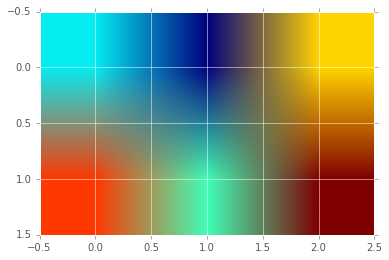

In [101]:
plt.imshow(x)

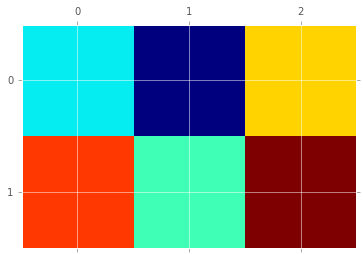

In [102]:
plt.matshow(x)

We can also solve systems of linear equations or linear operators' spectra

In [143]:
A = np.array([[1,1,0],[0,1,5],[-1,5,-1]])
b = np.array([7,1,-9])
np.linalg.solve(A,b)

array([ 7.29032258, -0.29032258,  0.25806452])

There are a number of routines to compute eigenvalues and eigenvectors, depending on the kind of matrix

- `eigvals` returns the eigenvalues of a matrix
- `eigvalsh` returns the eigenvalues of a Hermitian matrix
- `eig` returns the eigenvalues and eigenvectors of a matrix
- `eigh` returns the eigenvalues and eigenvectors of a Hermitian matrix.

In [146]:
np.linalg.eigvals(A)

array([-5.1777749 ,  1.20365593,  4.97411897])

In [148]:
np.linalg.eig(A)

(array([-5.1777749 ,  1.20365593,  4.97411897]),
 array([[ 0.10131172, -0.97985334,  0.19327087],
        [-0.62588099, -0.19955294,  0.76808142],
        [ 0.77331037, -0.00812803,  0.61048939]]))

### Example: finite differences

Before entering into scipy and the tools that can automatically help us to solve differential equations, is it interesting to use what we know and make a naive attempt by ourselves.

First, we want to be able to compute the derivative of functions:
$$
y'(x) = \lim_{h\to 0}\frac{y(x+h) - y(x)}{h}
$$

If the step `h` is very small we can think of discretizing the function $y(x)$ on an evenly spaced set of points $x_0, x_1, \ldots$, getting $y_0, y_1, \ldots$.

With this, the derivative can be approximated by
$$
y'(x) \sim \frac{y_{i+1} - y_i}{x_{i+1} - x_i}
$$
remember $x_{i+1}-x_{i} \sim h$, a very small number.

Let's use this and see what it looks like in python

In [157]:
def our_deriv(y, x):
    "Finite difference derivative of the function y(x) given the discretizations of y and x"
    
    n = len(y)
    d = np.zeros(n, dtype=float)
    
    for i in range(0,n-1):
        d[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
        
    # we need to shift in the other direction close to the boundary
    d[n-1] = (y[n-1]-y[n-2])/(x[n-1]-x[n-2])
    
    return d

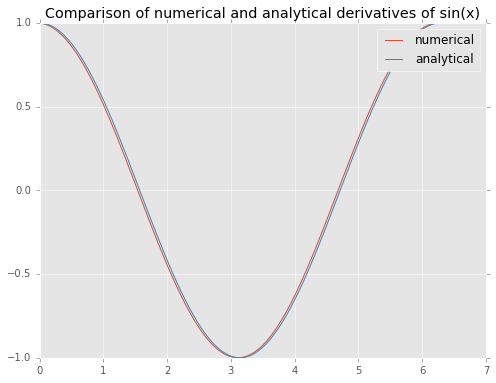

In [162]:
x = np.linspace(0., 2*np.pi,100)
our_derived_sin = our_deriv(np.sin(x), x)

plt.figure(figsize=(8,6))
plt.plot(x, our_derived_sin, label='numerical')
plt.plot(x, np.cos(x), label='analytical')

plt.title("Comparison of numerical and analytical derivatives of sin(x)")
plt.legend()
plt.show()

**Exercise 1**: Use centered finite differences
$$
y'(x) \sim \frac{y_{i+1} - y_{i-1}}{x_{i+1} - x_{i-1}}
$$

to get an additional improvement over our derivative. Note that you must take care of $d_0=0$ in a special way, similar as what we did for $d_{n-1}$ above.

Let's use this to solve a one-dimensional quantum Harmonic Oscillator!

We want to solve the eigenvalue eqution for the Schrodinger operator
$$
-\frac{\hbar^2}{2m} \Delta\psi(x) + V(x)\psi(x) = E\psi(x)
$$
where $V(x)=\frac{1}{2m}\omega^2 x^2$ is the harmonic oscillator potential. 

With the standard trick to transform the differential equation into a matrix equation, namely multiplying both sides by $\psi^*(x)$ and integrating over $x$, we get
$$
-\frac{\hbar^2}{2m}\int\psi^*(x)\Delta\psi(x)dx + \int V(x)|\psi(x)|^2dx = E
$$

We will again use the finite difference approximation. The finite difference formula for the second derivative is
$$
y'' \sim \frac{y_{i+1} - 2y_i + y_{i-1}}{x_{i+1} - x_{i-1}}
$$

If you think of the first integral as the measure of overlap between the function and it's second derivative, then the resulting overlap coming from the finite-difference discretization will be contained by three points: $y_{i+1}, y_i, y_{i-1}$. In matrix form this gives rise to the Laplacian tridiagonal matrix, which has -2's along the diagonals, and 1's along the diagonals above and below the main diagonal.

In a similar fashion, the second term leads to a diagonal matrix with $V(x_i)$ on the diagonal elements. 

Collecting all of these pieces together, we get:

In [169]:
def Laplacian(x):
    # as before we consider an evenly-spaced sequence of points
    h = x[1] - x[0]
    
    n = len(x)
    M = -2 * np.identity(n,dtype=float) + np.eye(n,n,1,dtype=float) + np.eye(n,n,-1,dtype=float)
    
    return M/h**2

In [190]:
def V(omega, m, xs):
    # compute the array of V(x_i)
    return 0.5/m*(omega**2)*(xs**2)

In [181]:
omega = 1.0
m     = 1.0

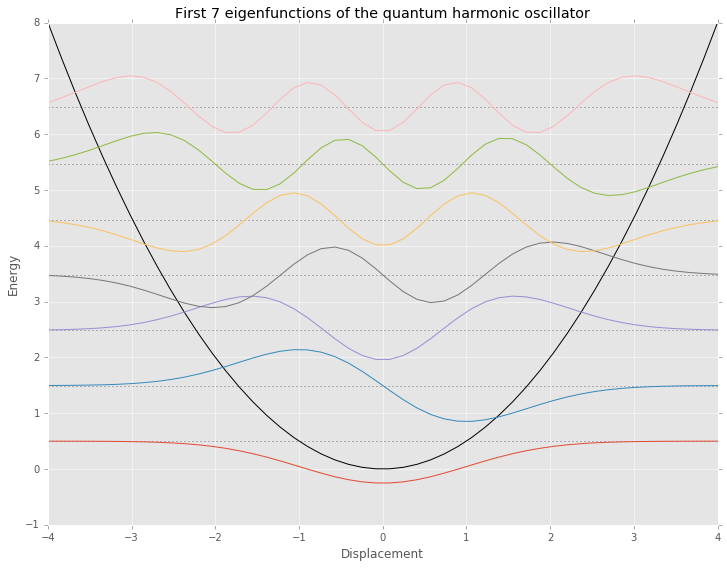

In [199]:
xs  = np.linspace(-4, 4)
L   = (-0.5/m)*Laplacian(xs)
# this matrix represents V as a multiplication operator
opV = np.diag(V(omega, m, xs))

H   =  L + opV

Evs, evecs = np.linalg.eigh(H)

# this is because we will do some rescaling to make the plot nicer
h = xs[1] - xs[0]

# how many eigenfunctions do we want to plot?
nev = 7

plt.figure(figsize=(12,9))
plt.title("First {} eigenfunctions of the quantum harmonic oscillator".format(nev))
plt.xlabel("Displacement")
plt.ylabel("Energy")

# plot the potential
plt.plot(xs, V(omega, m, xs), color="black")

for i in range(nev):
    # plot the energy level as an horizontal line (~ Add x-Horizontal Line)
    plt.axhline(y=Evs[i], color='black', linestyle=":", alpha=0.5)
    
    # plot the eigenfunction, rescaled and shifted by the energy level so they don't
    # pile up on each other. Note how we use slicing to get the columns
    plt.plot(xs, -evecs[:,i]/np.sqrt(h) + Evs[i])

plt.show()

Note that the eigenfunction of the harmonic oscillator are [well known](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator). We can use the special function module of numpy to compare the analytic eigenfunctions with the ones that we have obtained numerically.

In [206]:
from numpy.polynomial.hermite import Hermite
from math import factorial

def harmonic_oscillator_evec(x,n,m,omega):
    coeff = np.zeros(10, dtype=float)
    coeff[n] = 1.
    Hn = Hermite(coeff)
    return (1/np.sqrt(2**n*factorial(n))) * pow(m*omega/np.pi,0.25) * np.exp(-0.5*m*omega*x**2) * Hn(x*np.sqrt(m*omega))

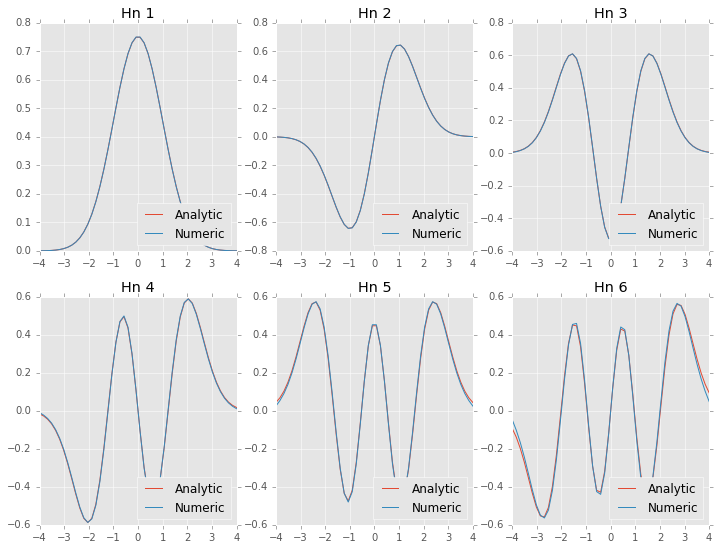

In [216]:
# we need to correct a phase difference by hand, but it's nothing serious
sign_correction = [1,1,-1,-1,1,1]

plt.figure(figsize=(12,9))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title("Hn {}".format(i+1))
    plt.plot(xs, harmonic_oscillator_evec(xs, i, m, omega),  label="Analytic")
    plt.plot(xs, sign_correction[i] * evecs[:,i]/np.sqrt(h), label="Numeric")
    plt.legend(loc=4)

plt.show()

Additional special functions can be found in the `scipy.special` module and in the `mpmath` module, an incredible library to work with arbitrary precision computations

**Exercise 2**: Use finite differences to solve the eigenvalue equation for the Schroedinger operators with potential $V(x) = Fx$ where $F$ is a positive or negative constant.

**Exercise 3**: Use finite differences to solve the eigenvalue equation for the Schroedinger operators with square well potential 
$$
V(x) =
\begin{cases}
a & \text{if } x < -1 \\
b & \text{if } -1 \leq x \leq 1 \\
c & \text{if } x > 1
\end{cases}
$$

Try to take $(a,b,c) = (1,0,1)$, $(a,b,c) = (1,-1,1)$, $(a,b,c) = (1,-5,0)$ and $(a,b,c) = (0,1,0)$. What do you observe?

## Very brief look at Scipy

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Some of the topics that SciPy covers are:

- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fftpack)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse Eigenvalue Problems (scipy.sparse)
- Statistics (scipy.stats)
- Multi-dimensional image processing (scipy.ndimage)
- File IO (scipy.io)

A fairly simple example: suppose that you need to compute numerically
$$
\int_0^\infty e^{-x} dx
$$
(of course you should realize that it's $1$ but assume that you need to compute it...)

You can use the quadrature method implemented in scipy as follows

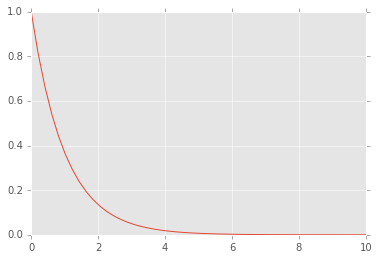

In [226]:
def f(x): return np.exp(-x)
x = np.linspace(0,10)
plt.plot(x, f(x))
plt.show()

In [231]:
import scipy.integrate as spi
val, abserr = spi.quad(f, 0, np.inf)

print("numerical  =", val, "±", abserr)
print("analytical =", 1.)

numerical  = 1.0000000000000002 ± 5.842606742906004e-11
analytical = 1.0


### Solve differential equations

Let's start from something simple and try to solve the Newton equation of motion describing the evolution of a particle in the air subject to gravity and friction.

The equation has the very simple form 
$$\begin{cases}
\frac{d^2}{dt^2} u = - \frac{k}{m} \frac{d}{dt} u + g \\
u(0)  = (0, 0) \\
u'(0) = (u_x, u_y)
\end{cases}
$$

where the initial velocity $(u_x, u_y)$, the drag coefficient $k$ and the mass $m$ are parameters that we will play with, and the acceleration of gravity is $g = (0, -9.81) m/s^2$. 

In [239]:
m = 1.  # particle's mass
g_y = -9.81  # gravity acceleration

To simulate a second order ODE we transform it to a system of first-order equations, thus replacing the $u$ above with $v = (u, u')$. The initial conditions will all be contained in $v_0$

In [253]:
def initial_conditions(angle=np.pi/3, strength=5.):
    # u(0) = (0,0)
    v = np.zeros(4, dtype=float)
    
    # u'(0) = (u_x, u_y)
    v[2] = strength*np.cos(angle)
    v[3] = strength*np.sin(angle)
    
    return v

In [274]:
def v_prime(v, t0, k, m):
    "The right hand side of the ODE"
    
    u, u_prime = v[:2], v[2:]
    
    # compute the second derivative u'' of u.
    u_sec = -k/m * u_prime
    u_sec[1] += g_y
    
    # return v'=[u', u''].
    return np.r_[u_prime, u_sec]

(0.0, 1.0)

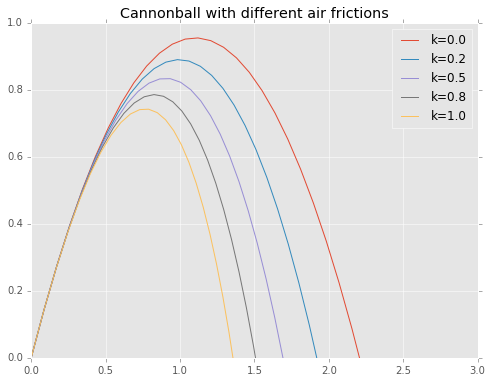

In [263]:
t = np.linspace(0., 1., 30)
v0 = initial_conditions()

plt.figure(figsize=(8,6))
plt.title("Cannonball with different air frictions")
# We simulate the system for different values of k
for k in np.linspace(0., 1., 5):
    # simulate the system and evaluate `v` at the given times
    v = spi.odeint(v_prime, v0, t, args=(k,m))
    # plot the particle's trajectory
    plt.plot(v[:,0], v[:,1], label="k={0:.1f}".format(k))

plt.legend()
plt.xlim(0., 3.)
plt.ylim(0., 1.)

(0.0, 1.0)

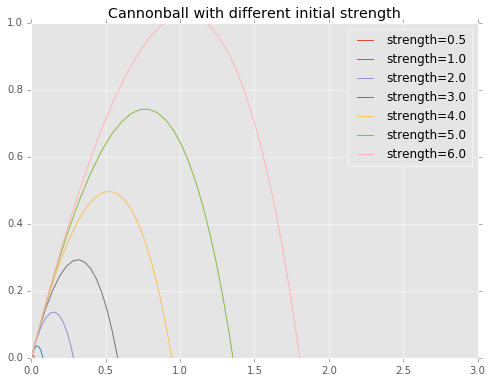

In [269]:
t = np.linspace(0., 1., 30)
initial_strength = [0.5, 1., 2., 3., 4., 5., 6.]

plt.figure(figsize=(8,6))
plt.title("Cannonball with different initial strength")

for s in initial_strength:
    v0 = initial_conditions(strength=s)
    v = spi.odeint(v_prime, v0, t, args=(1.,m))
    # plot the particle's trajectory
    plt.plot(v[:,0], v[:,1], label="strength={0:.1f}".format(s))

plt.legend()
plt.xlim(0., 3.)
plt.ylim(0., 1.)

(0.0, 1.0)

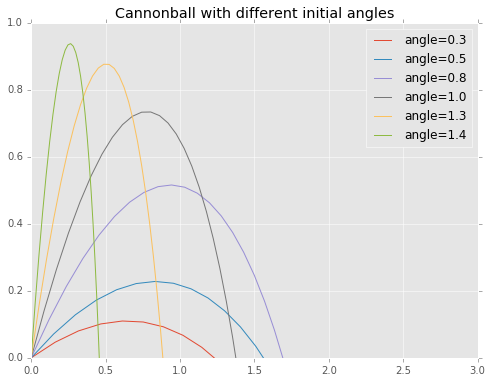

In [273]:
t = np.linspace(0., 1., 30)
initial_angle = np.pi*np.array([0.1, 0.15, 0.25, 0.33, 0.4, 0.45])

plt.figure(figsize=(8,6))
plt.title("Cannonball with different initial angles")

for a in initial_angle:
    v0 = initial_conditions(angle=a)
    v = spi.odeint(v_prime, v0, t, args=(1.,m))
    # plot the particle's trajectory
    plt.plot(v[:,0], v[:,1], label="angle={0:.1f}".format(a))

plt.legend()
plt.xlim(0., 3.)
plt.ylim(0., 1.)

**Exercise 4**: use the idea above to solve the [damped harmonic oscillator](http://en.wikipedia.org/wiki/Damping)

**Final challenge**: solve the equations of motion of the [double pendulum](https://en.wikipedia.org/wiki/Double_pendulum#Lagrangian) and show the behaviour with an animation (hint: look at the linked material to figure out out to animate things)